In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import tkinter as tk
from tkinter import filedialog
import matplotlib.patches as mpatches
import os

# Bout Bar Plot

Animal               AH1   AH4   AH2   AH3
Keys                                      
Locomotion          3534  4133  4802  4569
Investigate Type 1   183   471   328   383
Investigate Type 2  4057  3524  4904  4501
Investigate Type 3   384   483   207   332
Dive/Scrunch         143   449   173   244
Contra-Orient        892  1544  1738  1584
Ipsi-Orient         1290  1839  1727  2117
Face Groom Type 1    258   497   194   329
Face Groom Type 2      1    19     7     3
Rear                  15    25    16    19
Ipsi-Body Groom      116   242    41    44
Contra-Body Groom     94   378    56    46
Ipsi-Itch Type 1     129   288   114    83
Contra-Itch          804  1429   645   469
Head Groom            27    94    37    55
Paw-Groom              7    44    12     2


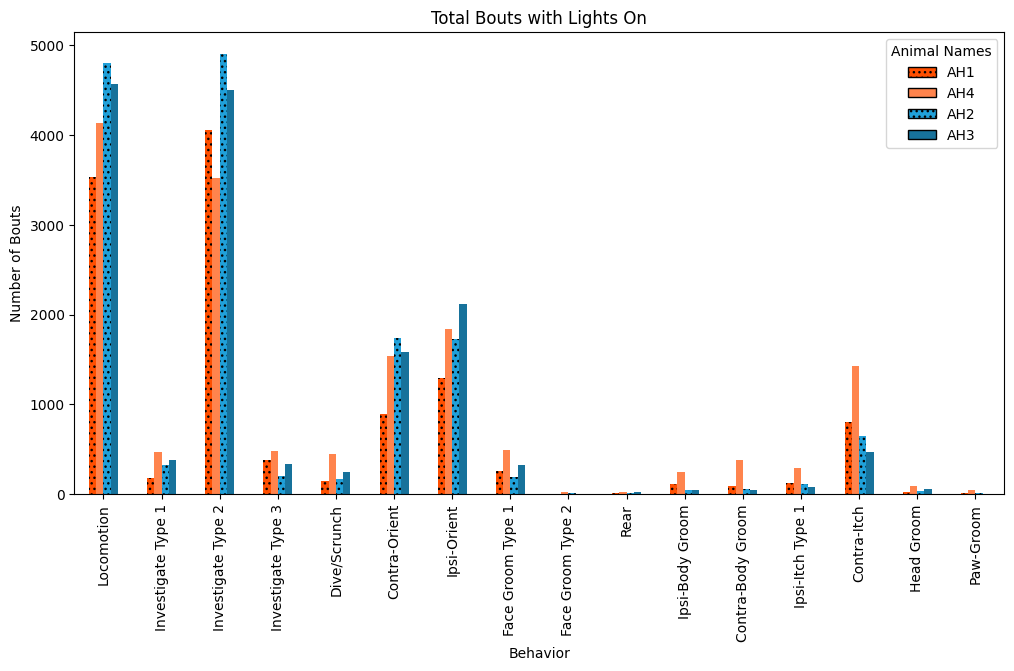

In [47]:
# Define the function to parse the CSV file
def parse_csv(filename):
    data = {}
    animal_name = ""

    with open(filename, newline='') as csvfile:
        first_line = csvfile.readline().strip().split(' ')
        if len(first_line) >= 1:
            animal_name = first_line[0].strip()

    reader = pd.read_csv(filename, skiprows=1)
    for index, row in reader.iterrows():
        if animal_name:
            key = row[0]
            value = int(row[1])
            data[animal_name] = data.get(animal_name, {})
            data[animal_name][key] = value

    return data

root = tk.Tk()
root.withdraw()

file_paths = filedialog.askopenfilenames(
    title="Select CSV Files",
    filetypes=[("CSV Files", "*.csv")]
)

if not file_paths:
    print("No CSV files selected.")
else:
    keys = []
    values = []
    colors = []

    for file_path in file_paths:
        file_data = parse_csv(file_path)
        for animal, data in file_data.items():
            if 'insignificant' in data:
                del data['insignificant']  # Remove the 'Insignificant' key and its data
            for key, value in data.items():
                keys.append(key)
                values.append(value)
                colors.append(animal)

    df = pd.DataFrame({'Keys': keys, 'Values': values, 'Animal': colors})
    
    # Filter out the 'Insignificant' key and its data from the DataFrame
    df = df[df['Keys'] != 'insignificant']
    
    # Reorder the DataFrame by the desired animal order and index order
    animal_order = ['AH1', 'AH4', 'AH2', 'AH3']
    key_order = ['Locomotion', 'Investigate Type 1','Investigate Type 2', 'Investigate Type 3',
                 'Dive/Scrunch', 'Contra-Orient','Ipsi-Orient','Face Groom Type 1',
                 'Face Groom Type 2', 'Rear','Ipsi-Body Groom','Contra-Body Groom', 'Ipsi-Itch Type 1',
                 'Contra-Itch', 'Head Groom', 'Paw-Groom'
                ] # Get the unique keys in the order they appear in the DataFrame
    
    pivot_df = df.pivot(index='Keys', columns='Animal', values='Values')

    # Reorder columns based on animal_order
    pivot_df = pivot_df[animal_order]

    # Reorder rows based on key_order
    pivot_df = pivot_df.reindex(key_order)

    # Define colors for AH1, AH2, AH3, and AH4
    colors = {'AH1': '#ff4f00', 'AH2': '#20a0d9', 'AH3': '#17729b', 'AH4': '#ff844d'}
    
    ax = pivot_df.plot(kind='bar', figsize=(12, 6), color=[colors.get(col, 'gray') for col in pivot_df.columns])
    
    folders = (os.path.dirname(file_path)).split('/')
    fol5 = folders[5].split(' ')  # Split element at position 3 by hyphen
    fol6 = folders[6]  
    
    # You want to count skip every 16 which is one animal because hatching identifies the animal. 
    # This ensures there is one animal per group with hatching 
    step = 16  # Step size: The number of behaviors for each animal
    counter = 0  # Counter to keep track of the current position
    bars_to_hatch = []
    while counter < len(ax.patches):
        bars_to_hatch.extend(ax.patches[counter:counter+step])
        counter += step * 2

    for i, bar in enumerate(bars_to_hatch):
        if i < 16:
            bar.set_hatch('...')  # Apply '***' hatch pattern to the first 16 bars
        else:
            bar.set_hatch('...')  # Apply '///' hatch pattern to the next 16 bars

    plt.title(f'Total {fol5[0]}s with {fol6}')
    plt.xlabel('Behavior')
    plt.ylabel('Number of Bouts')
    # Print the table
    print(pivot_df)
    # Define the order of animal names
    animal_order = ['AH1', 'AH4', 'AH2', 'AH3']

    # Create a legend with labels and hatching patterns
    legend_handles = []

    for animal in animal_order:
        # Create a colored patch with a label and custom hatch pattern
        color_patch = mpatches.Patch(facecolor=colors.get(animal, 'gray'), edgecolor='black', label=animal, hatch='...' if animal == 'AH1' else '...' if animal == 'AH2' else '')

        # Append the color patch to the legend_handles list
        legend_handles.append(color_patch)

    # Add a legend to the plot, specifying the custom legend handles
    plt.legend(handles=legend_handles, title='Animal Names')

    # Display the plot
    plt.show()
root.destroy()


# Average Duration Bar Plot

Animal                   AH1       AH4       AH2       AH3
Keys                                                      
Locomotion          0.252518  0.288701  0.320429  0.358415
Investigate Type 1  0.229508  0.296178  0.164024  0.203394
Investigate Type 2  0.326695  0.299858  0.286705  0.246256
Investigate Type 3  0.339583  0.227536  0.180676  0.242771
Dive/Scrunch        0.111888  0.122494  0.120231  0.108197
Contra-Orient       0.115695  0.129793  0.120483  0.125442
Ipsi-Orient         0.115969  0.127026  0.130689  0.149410
Face Groom Type 1   0.293023  0.295976  0.169588  0.191489
Face Groom Type 2   0.100000  0.136842  0.128571  0.100000
Rear                0.153333  0.144000  0.156250  0.115789
Ipsi-Body Groom     0.200862  0.176860  0.134146  0.129545
Contra-Body Groom   0.118085  0.142063  0.116071  0.117391
Ipsi-Itch Type 1    0.100775  0.102778  0.105263  0.106024
Contra-Itch         0.152861  0.165780  0.149612  0.139446
Head Groom          0.133333  0.192553  0.132432  0.1527

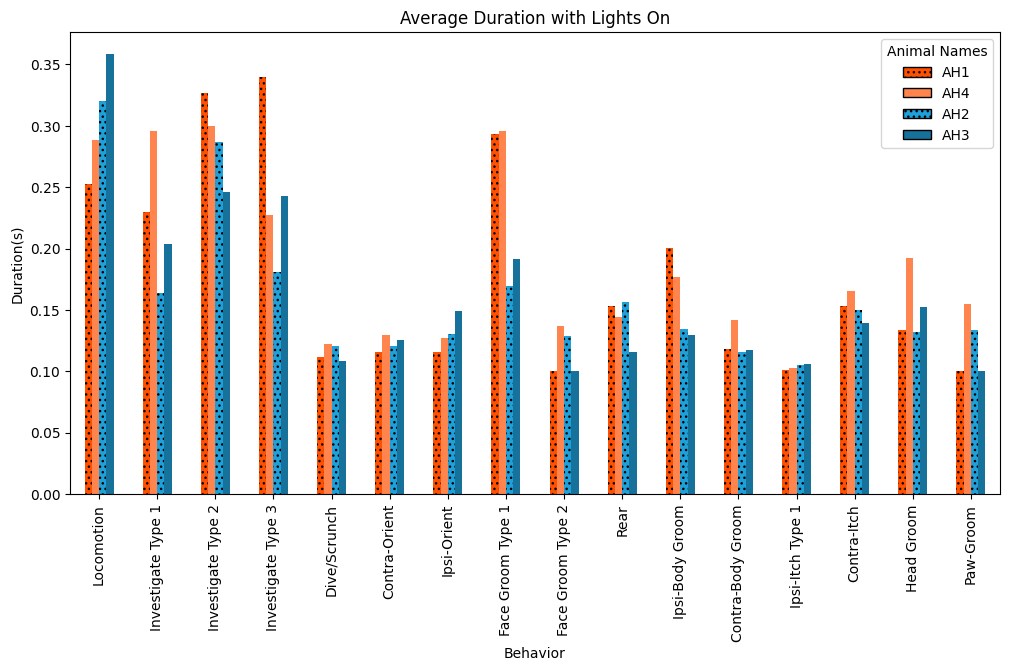

In [55]:
# Define the function to parse the CSV file
def parse_csv(filename):
    data = {}
    animal_name = ""

    with open(filename, newline='') as csvfile:
        first_line = csvfile.readline().strip().split(' ')
        if len(first_line) >= 1:
            animal_name = first_line[0].strip()

    reader = pd.read_csv(filename, skiprows=1)
    for index, row in reader.iterrows():
        if animal_name:
            key = row[0]
            value = float(row[1])
            data[animal_name] = data.get(animal_name, {})
            data[animal_name][key] = value

    return data

root = tk.Tk()
root.withdraw()

file_paths = filedialog.askopenfilenames(
    title="Select CSV Files",
    filetypes=[("CSV Files", "*.csv")]
)

if not file_paths:
    print("No CSV files selected.")
else:
    keys = []
    values = []
    colors = []

    for file_path in file_paths:
        file_data = parse_csv(file_path)
        for animal, data in file_data.items():
            if 'insignificant' in data:
                del data['insignificant']  # Remove the 'Insignificant' key and its data
            for key, value in data.items():
                keys.append(key)
                values.append(value)
                colors.append(animal)

    df = pd.DataFrame({'Keys': keys, 'Values': values, 'Animal': colors})
    
    # Filter out the 'Insignificant' key and its data from the DataFrame
    df = df[df['Keys'] != 'insignificant']
    
    # Reorder the DataFrame by the desired animal order and index order
    animal_order = ['AH1', 'AH4', 'AH2', 'AH3']
    key_order = ['Locomotion', 'Investigate Type 1','Investigate Type 2', 'Investigate Type 3',
                'Dive/Scrunch', 'Contra-Orient','Ipsi-Orient','Face Groom Type 1',
                'Face Groom Type 2', 'Rear','Ipsi-Body Groom','Contra-Body Groom',
                'Ipsi-Itch Type 1', 'Contra-Itch','Head Groom', 'Paw-Groom'
                 ]   # Get the unique keys in the order they appear in the DataFrame

    pivot_df = df.pivot(index='Keys', columns='Animal', values='Values')

    # Reorder columns based on animal_order
    pivot_df = pivot_df[animal_order]

    # Reorder rows based on key_order
    pivot_df = pivot_df.reindex(key_order)

    # Define colors for AH1, AH2, AH3, and AH4
    colors = {'AH1': '#ff4f00', 'AH2': '#20a0d9', 'AH3': '#17729b', 'AH4': '#ff844d'}
    
    ax = pivot_df.plot(kind='bar', figsize=(12, 6), color=[colors.get(col, 'gray') for col in pivot_df.columns])
    
    folders = (os.path.dirname(file_path)).split('/')
    fol5 = folders[5].split(' ')  # Split element at position 3 by hyphen
    fol6 = folders[6]  
    
    # You want to count skip every 16 which is one animal because hatching identifies the animal. 
    # This ensures there is one animal per group with hatching 
    step = 16  # Step size: The number of behaviors for each animal
    counter = 0  # Counter to keep track of the current position
    bars_to_hatch = []
    while counter < len(ax.patches):
        bars_to_hatch.extend(ax.patches[counter:counter+step])
        counter += step * 2

    for i, bar in enumerate(bars_to_hatch):
        if i < 16:
            bar.set_hatch('...')  # Apply '***' hatch pattern to the first 16 bars
        else:
            bar.set_hatch('...')  # Apply '///' hatch pattern to the next 16 bars

    plt.title(f'{fol5[0]} {fol5[1]} with {fol6}')
    plt.xlabel('Behavior')
    plt.ylabel('Duration(s)')
    print(pivot_df)


    # Create a legend with labels and hatching patterns
    legend_handles = []

    for animal in animal_order:
        # Create a colored patch with a label and custom hatch pattern
        color_patch = mpatches.Patch(facecolor=colors.get(animal, 'gray'), edgecolor='black', label=animal, hatch='...' if animal == 'AH1' else '...' if animal == 'AH2' else '')

        # Append the color patch to the legend_handles list
        legend_handles.append(color_patch)

    # Add a legend to the plot, specifying the custom legend handles
    plt.legend(handles=legend_handles, title='Animal Names')

    # Display the plot
    plt.show()
root.destroy()
